# exc 1a

Creating a dataset for:

$$
f(x) = \frac{1}{1+25x^2}, \quad x \in [-1,1]
$$

In [66]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import seaborn as sns 
from numpy.random import rand
from numpy.random import seed

In [63]:
#n = 100
#x = np.linspace(-1,1, n) #x within interval [-1,1]
#denominator = 1+(25*x**2)
#defining y and adding noise as a normal distrubution with mean 0 and std 1
#y = 1/denominator + np.random.normal(0, 1, x.shape) 

np.random.seed(3155)


In [4]:
#Perform a standard ordinary least square regression analysis
#Import polynimial features from func_list and OLS_parameters
from func_list import polynomial_features, OLS_parameters#, mse_poly_plot

In [5]:
#The task says to use a polynomial higher than 15 so we have used 16 with intercept not included
#X_task1 = polynomial_features(x, p = 16, intercept = False) 

#checking that it works as it should
#print(X_task1) 

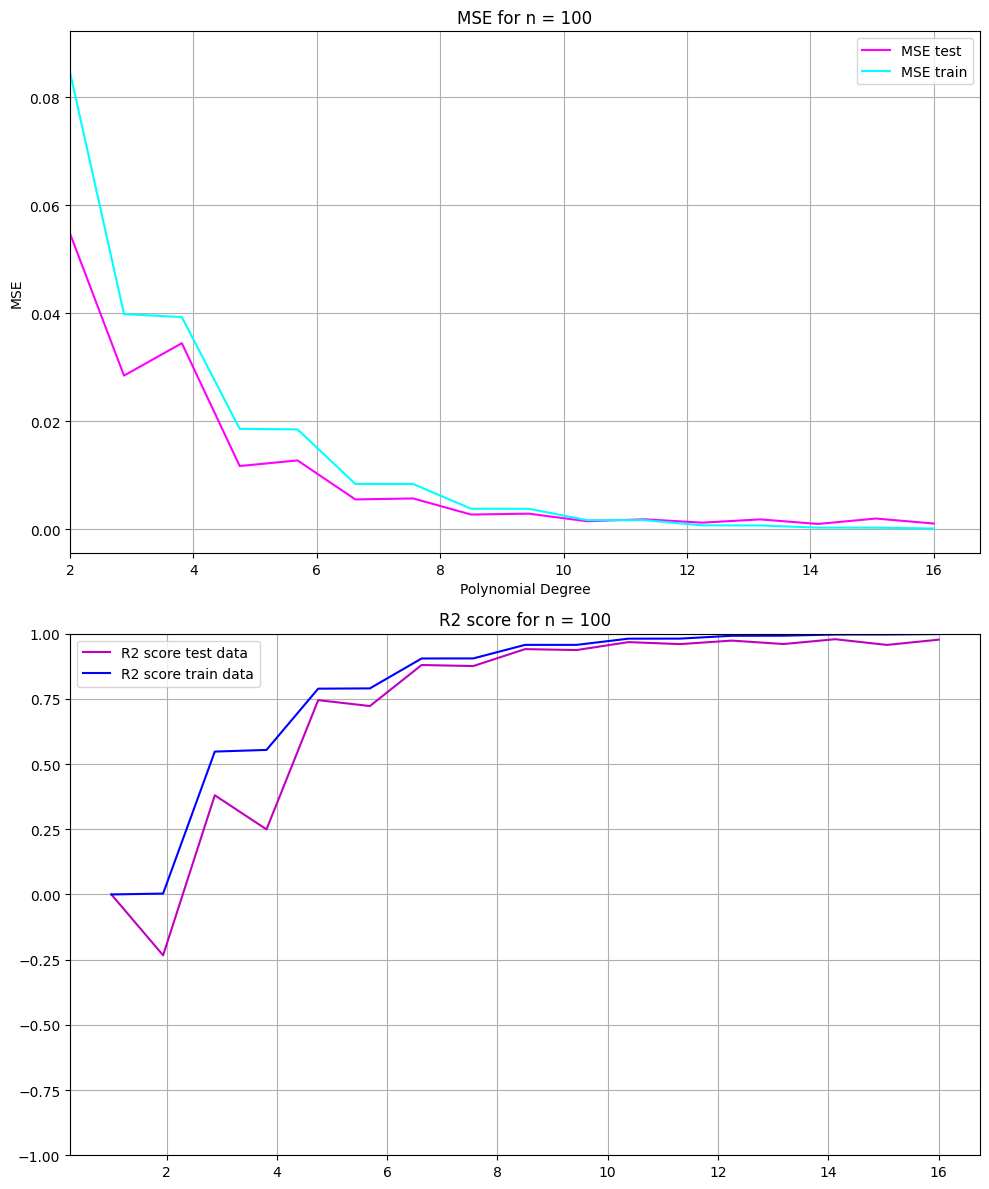

[ 0.00000000e+00 -5.97087104e-02 -1.70277260e+01  2.06956039e+00
  1.66910624e+02 -2.32424211e+01 -9.06718865e+02  1.19556669e+02
  2.84550352e+03 -3.20068117e+02 -5.27688246e+03  4.60244095e+02
  5.69507508e+03 -3.36158037e+02 -3.30119429e+03  9.76542026e+01
  7.93403240e+02]


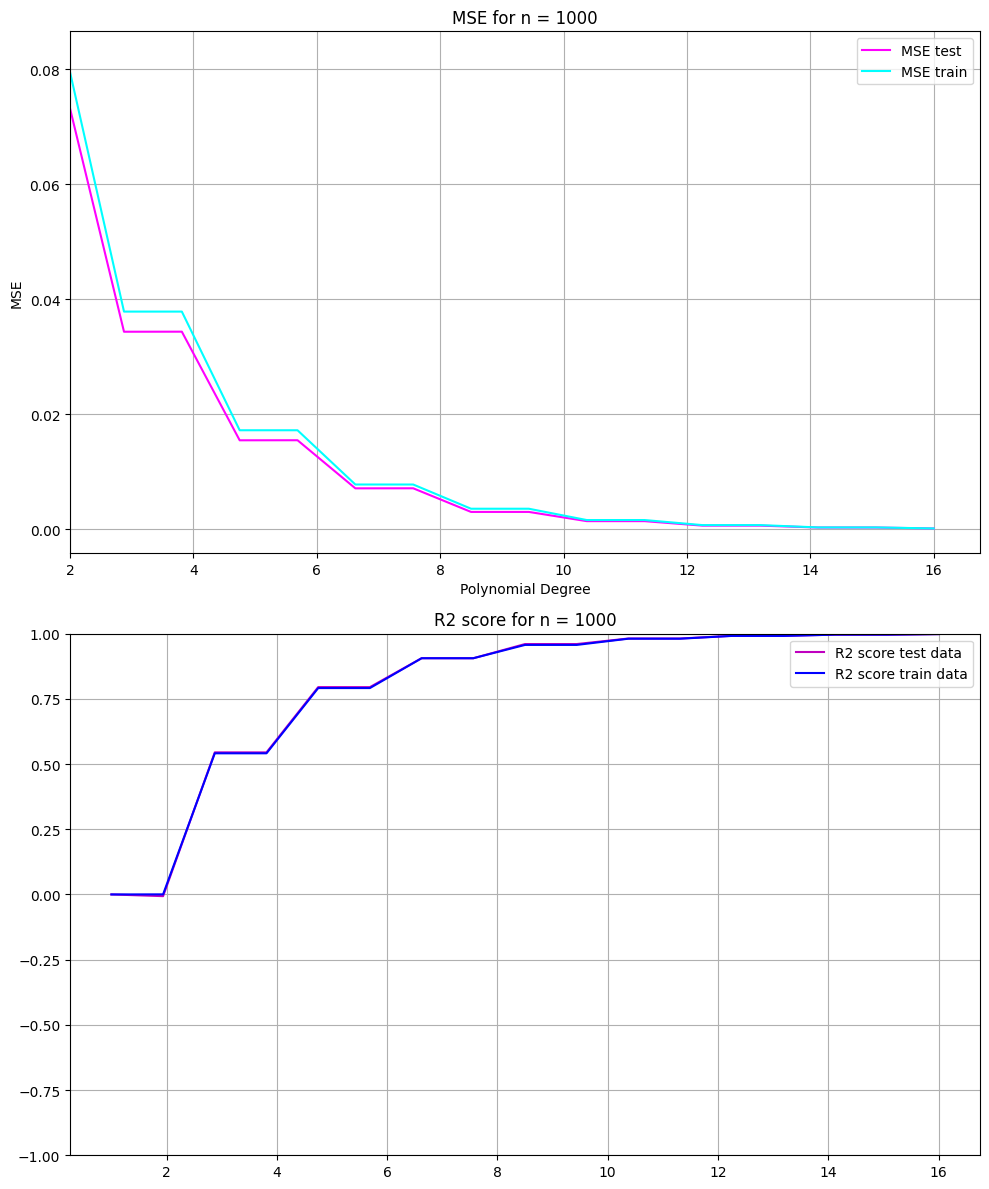

[ 0.00000000e+00 -8.41443567e-03 -1.68929535e+01  1.66006356e-01
  1.64103744e+02 -1.37916081e+00 -8.79934673e+02  5.99540021e+00
  2.71654473e+03 -1.49438387e+01 -4.94478285e+03  2.13446945e+01
  5.23158067e+03 -1.60648247e+01 -2.97129064e+03  4.89665688e+00
  6.99770602e+02]


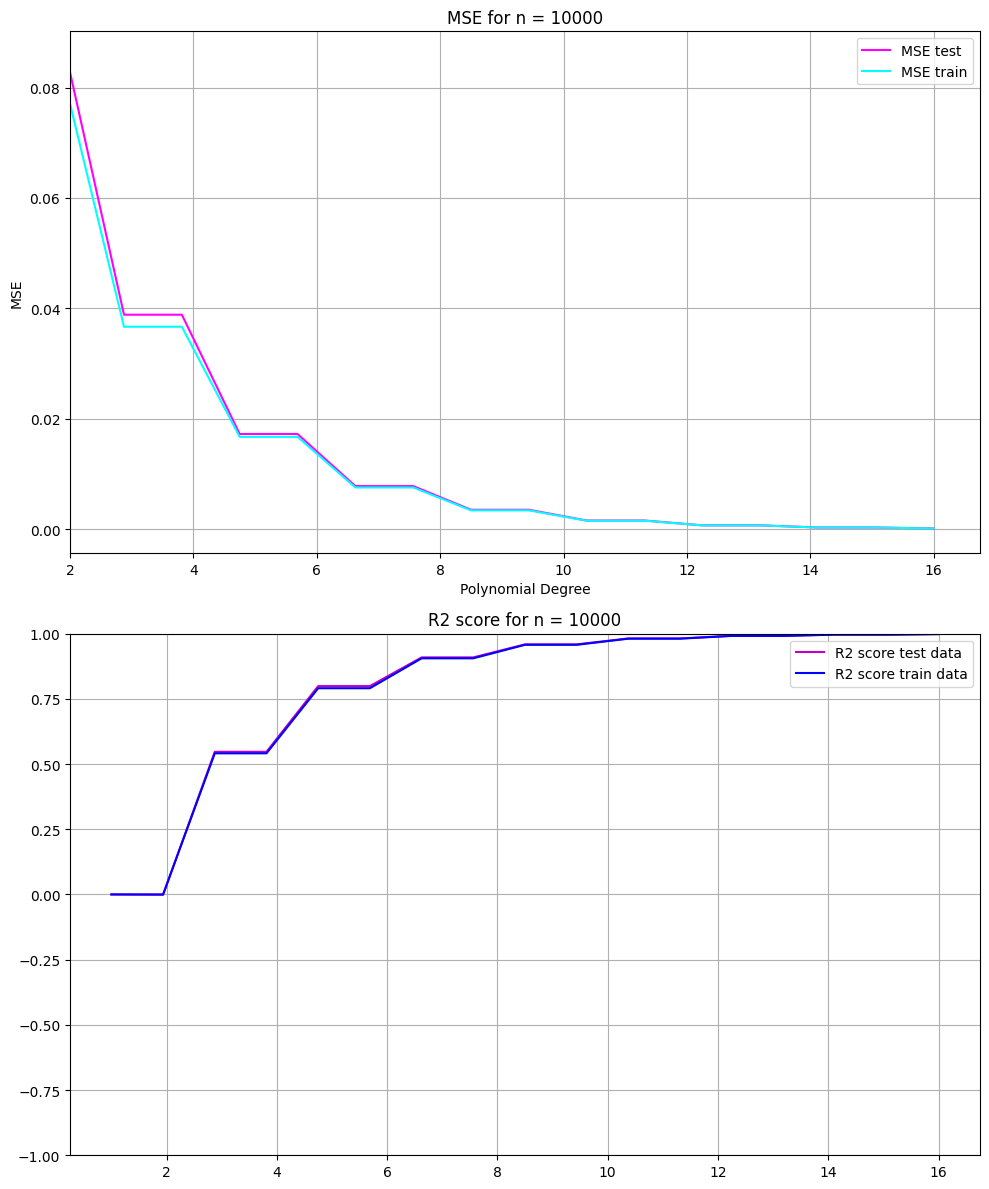

[ 0.00000000e+00 -1.73196139e-03 -1.68007788e+01  4.40270171e-02
  1.62815864e+02 -3.97592955e-01 -8.71816040e+02  1.73461539e+00
  2.68971745e+03 -4.03017298e+00 -4.89500402e+03  5.04448604e+00
  5.17936684e+03 -3.18680998e+00 -2.94239038e+03  7.92229540e-01
  6.93211199e+02]


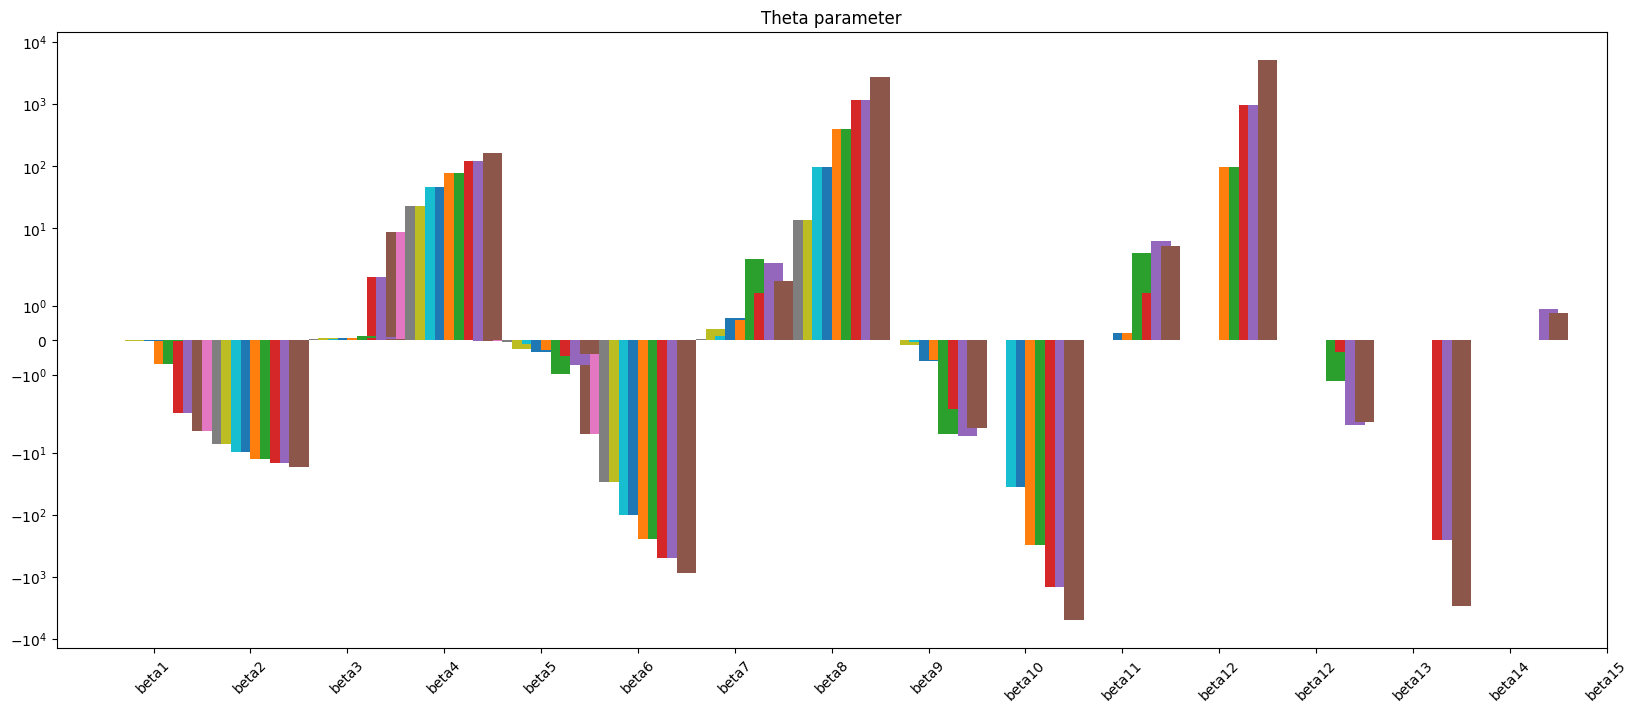

In [ ]:
#Now that we have our design matrix, I will use the function mse_poly_plot
#explain the code later!!!!!!!

#MSE and changing the polynomial degree
def mse_poly_plot_OLS(degree, intercept=bool):
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        poly_deg = np.linspace(1,degree,degree+1)
        mse_train_list = np.zeros(degree+1)
        mse_test_list = np.zeros(degree+1)
        R2_test = np.zeros(degree+1)
        R2_train = np.zeros(degree+1)
        beta_matrix = np.zeros((degree+1, degree+1))

        #range polynomial degree
        for p in range(1, degree+1):
            X = polynomial_features(x,p,intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
            scaler = StandardScaler(with_std = False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean) 

            beta = OLS_parameters(X_train_s,y_scaled_train)
        
            y_pred_train = (X_train_s @ beta + y_mean)
            y_pred_test = (X_test_s @ beta + y_mean)

            mse_train_list[p] = MSE(y_train,y_pred_train)
            mse_test_list[p] = MSE(y_test, y_pred_test)

            R2_test[p] = r2_score(y_test, y_pred_test)
            #print(f'The R2 score is: {R2_test} for degree: {p}')
            R2_train[p] = r2_score(y_train, y_pred_train)

            for i in range(len(beta)):
                beta_matrix[p-1,i] = beta[i]    
                #print(beta_matrix)
    

        fig,ax = plt.subplots(2, figsize=(10,12))
        ax[0].plot(poly_deg, mse_test_list, label = "MSE test", color = "magenta")
        ax[0].plot(poly_deg, mse_train_list, label = "MSE train", color = "cyan")
        ax[0].set_title(f'MSE for n = {n}')
        ax[0].set_ylabel("MSE")
        ax[0].set_xlabel("Polynomial Degree")
        ax[1].plot(poly_deg, R2_test, label = 'R2 score test data', color = 'm')
        ax[1].plot(poly_deg, R2_train, label = 'R2 score train data', color = 'b')
        ax[1].set_ylim(-1,1)
        ax[1].set_title(f'R2 score for n = {n}')
        ax[0].set_xlim(2)
        ax[0].grid(True)
        ax[0].legend()
        ax[1].legend()
        ax[1].grid(True)
        plt.tight_layout()
        plt.show()
        print(beta)

    
    num_rows, num_columns = beta_matrix.shape
    names = ['beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10', 'beta11', 'beta12', 'beta12', 'beta13', 'beta14', 'beta15']
    bar_width = 0.1
    r = np.arange(num_columns)
    plt.figure(figsize=(20,8))
    for m in range(num_rows): 
        plt.bar(r + m * bar_width, beta_matrix[m, :degree+1], label = f'Row: {m+1}', width=0.2)
        plt.xticks(range(2,degree+2),names, rotation = 45)
        plt.yscale('symlog')
        plt.title('Theta parameter')
        plt.xlim(1)



    return beta

beta_ols = mse_poly_plot_OLS(degree=16, intercept=False)

In the above code we have used the optimization of OLS to find the parameter theta of a 
linear regression model that best describes/fits our data by minimizing the sum 
sum of the squared differences between the actual data points and the predicted values.

# Exercise 1B

In [8]:
from func_list import Ridge_parameters

#MSE and changing lambda
def poly_plot_ridge(intercept=False, annotate = False):
    np.random.seed(3155)
    nlambdas = 16
    lambdas = np.logspace(-5,1,nlambdas)
    degree = 16
    poly_deg = np.arange(1,degree,degree+1) #c 
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        mse_train_list = np.zeros((degree, nlambdas,))
        mse_test_list = np.zeros((degree, nlambdas))
        R2_test = np.zeros((degree, nlambdas))
        R2_train = np.zeros((degree, nlambdas))
        #beta_matrix = np.zeros(((nlambdas+1, nlambdas)))

        #range polynomial degree
        for p in range(1, degree+1):
            for j, lmb in enumerate(lambdas):
                X = polynomial_features(x,p,intercept=intercept)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                scaler = StandardScaler(with_std = True) #scale with standard deviation this time
                scaler.fit(X_train)
                X_train_s = scaler.transform(X_train)
                X_test_s = scaler.transform(X_test)
                y_mean = np.mean(y_train)
                #y_std = np.std(y_train)
                y_scaled_train = (y_train - y_mean) #centered, not scaled

                beta = Ridge_parameters(X_train_s, y_scaled_train, lmb)
    
                y_pred_train = (X_train_s @ beta + y_mean)
                y_pred_test = (X_test_s @ beta + y_mean)

                mse_train_list[p-1,j] = MSE(y_train,y_pred_train)
                mse_test_list[p-1,j] = MSE(y_test, y_pred_test)

                R2_test[p-1,j] = r2_score(y_test, y_pred_test)
                R2_train[p-1,j] = r2_score(y_train, y_pred_train)
        
        fig,axes = plt.subplots(2,2, figsize=(16,16)) #c 
        titles = ['MSE train', 'MSE test', '$R^2$ train', '$R^2$ test']
        data = [mse_train_list, mse_test_list, R2_train, R2_test]
        for ax, title,plotting in zip(axes.ravel(), titles, data):
            sns.heatmap(plotting, ax=ax, xticklabels=[f'{lmb:.1e}' for lmb in lambdas], yticklabels=np.arange(1,degree+1), cmap='PiYG', annot = annotate, cbar = True)
            ax.set_title(f'{title} for n: {n}')
            ax.set_ylabel('Polynomial Degree')
            ax.set_xlabel(f'$\lambda$')
            ax.invert_yaxis()
            ax.invert_xaxis()
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    plt.show()
    #return mse_test_list, mse_train_list
    return beta

    #return mse_test_list, mse_train_list

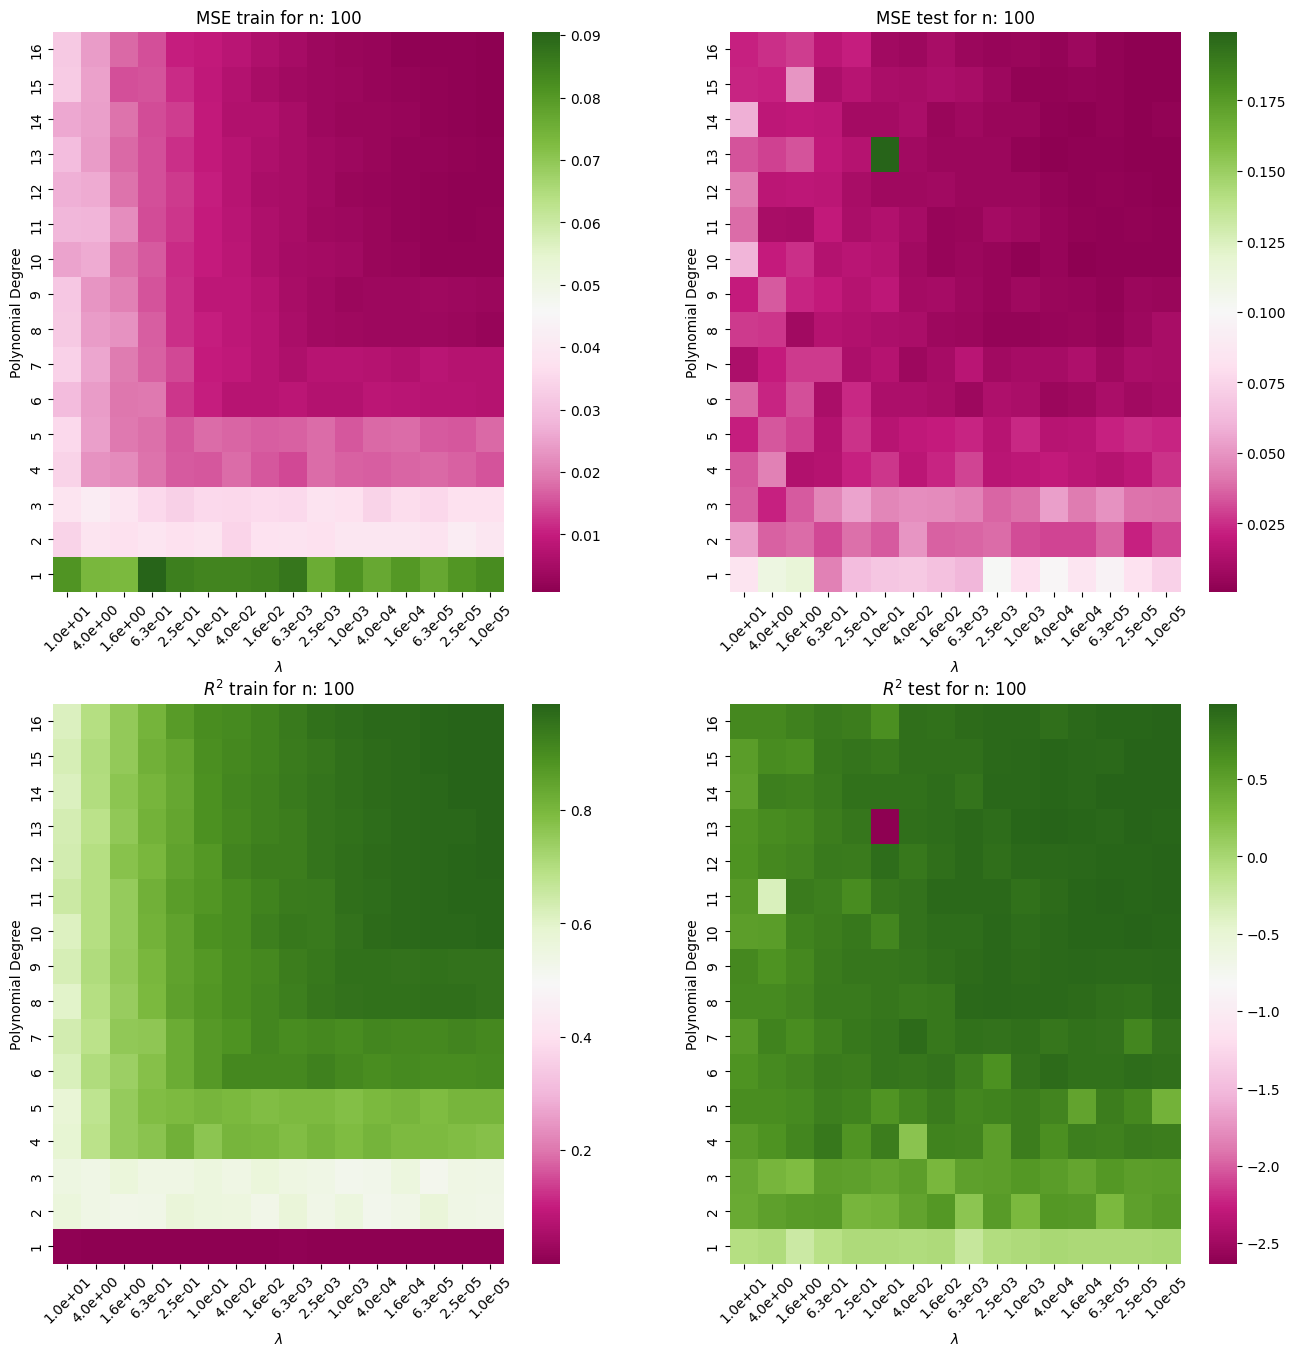

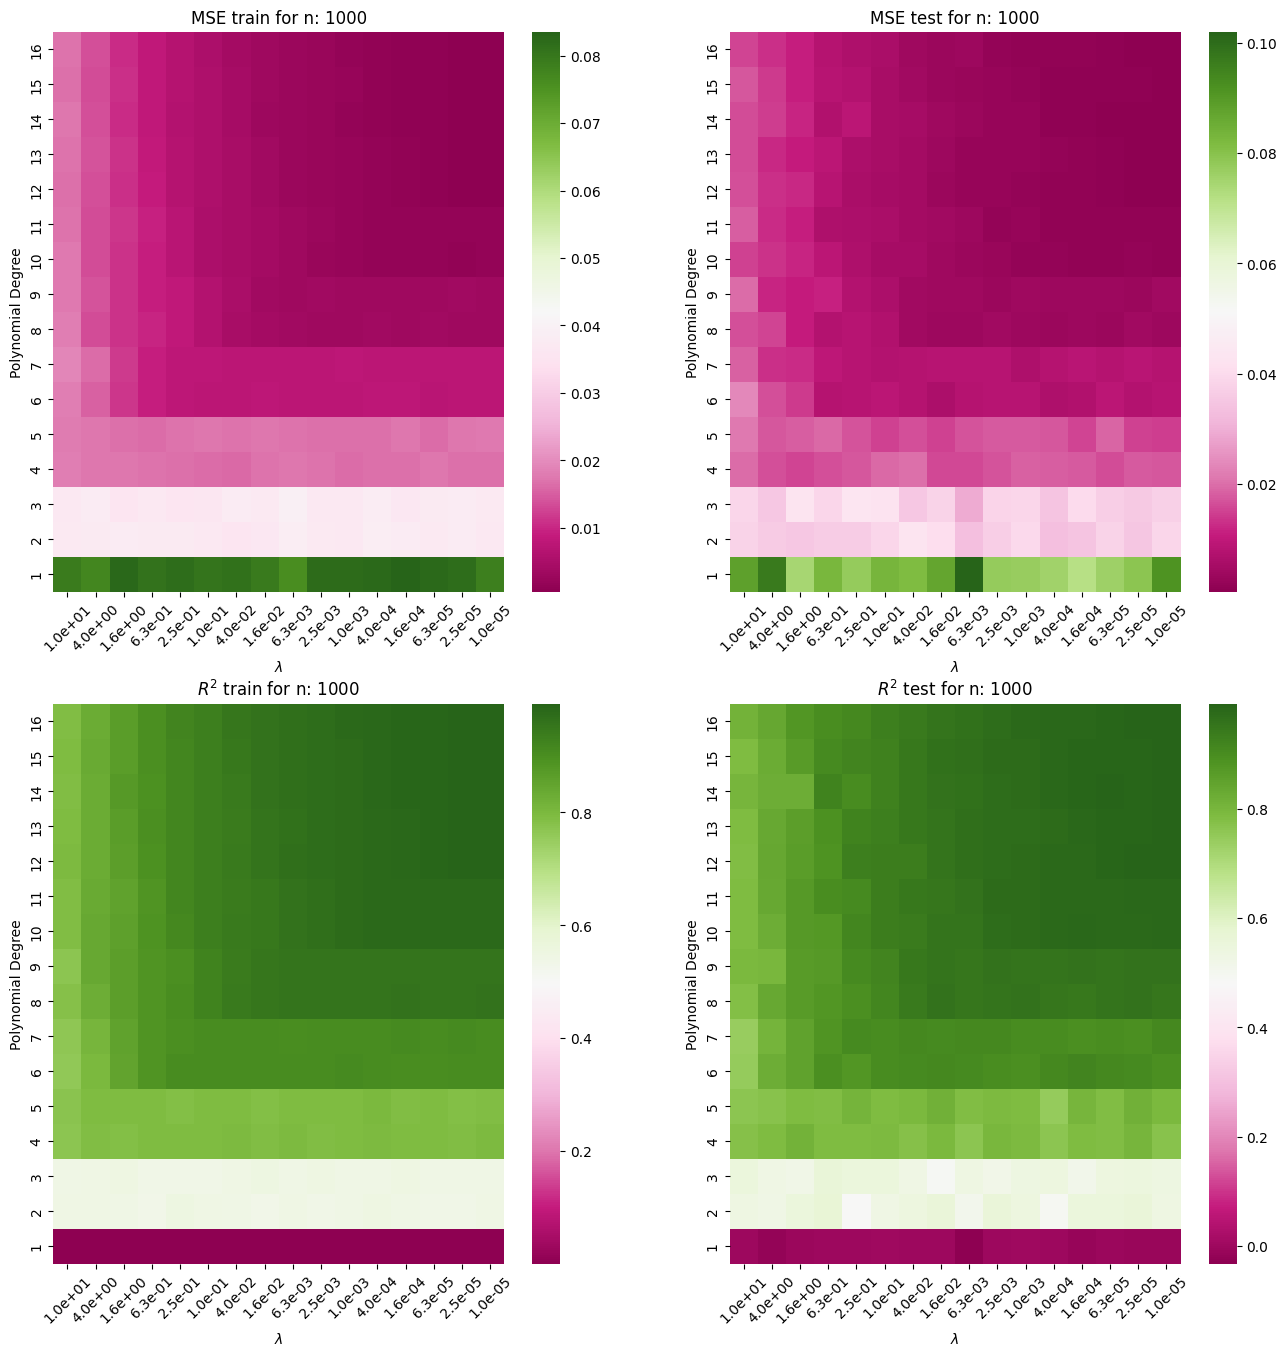

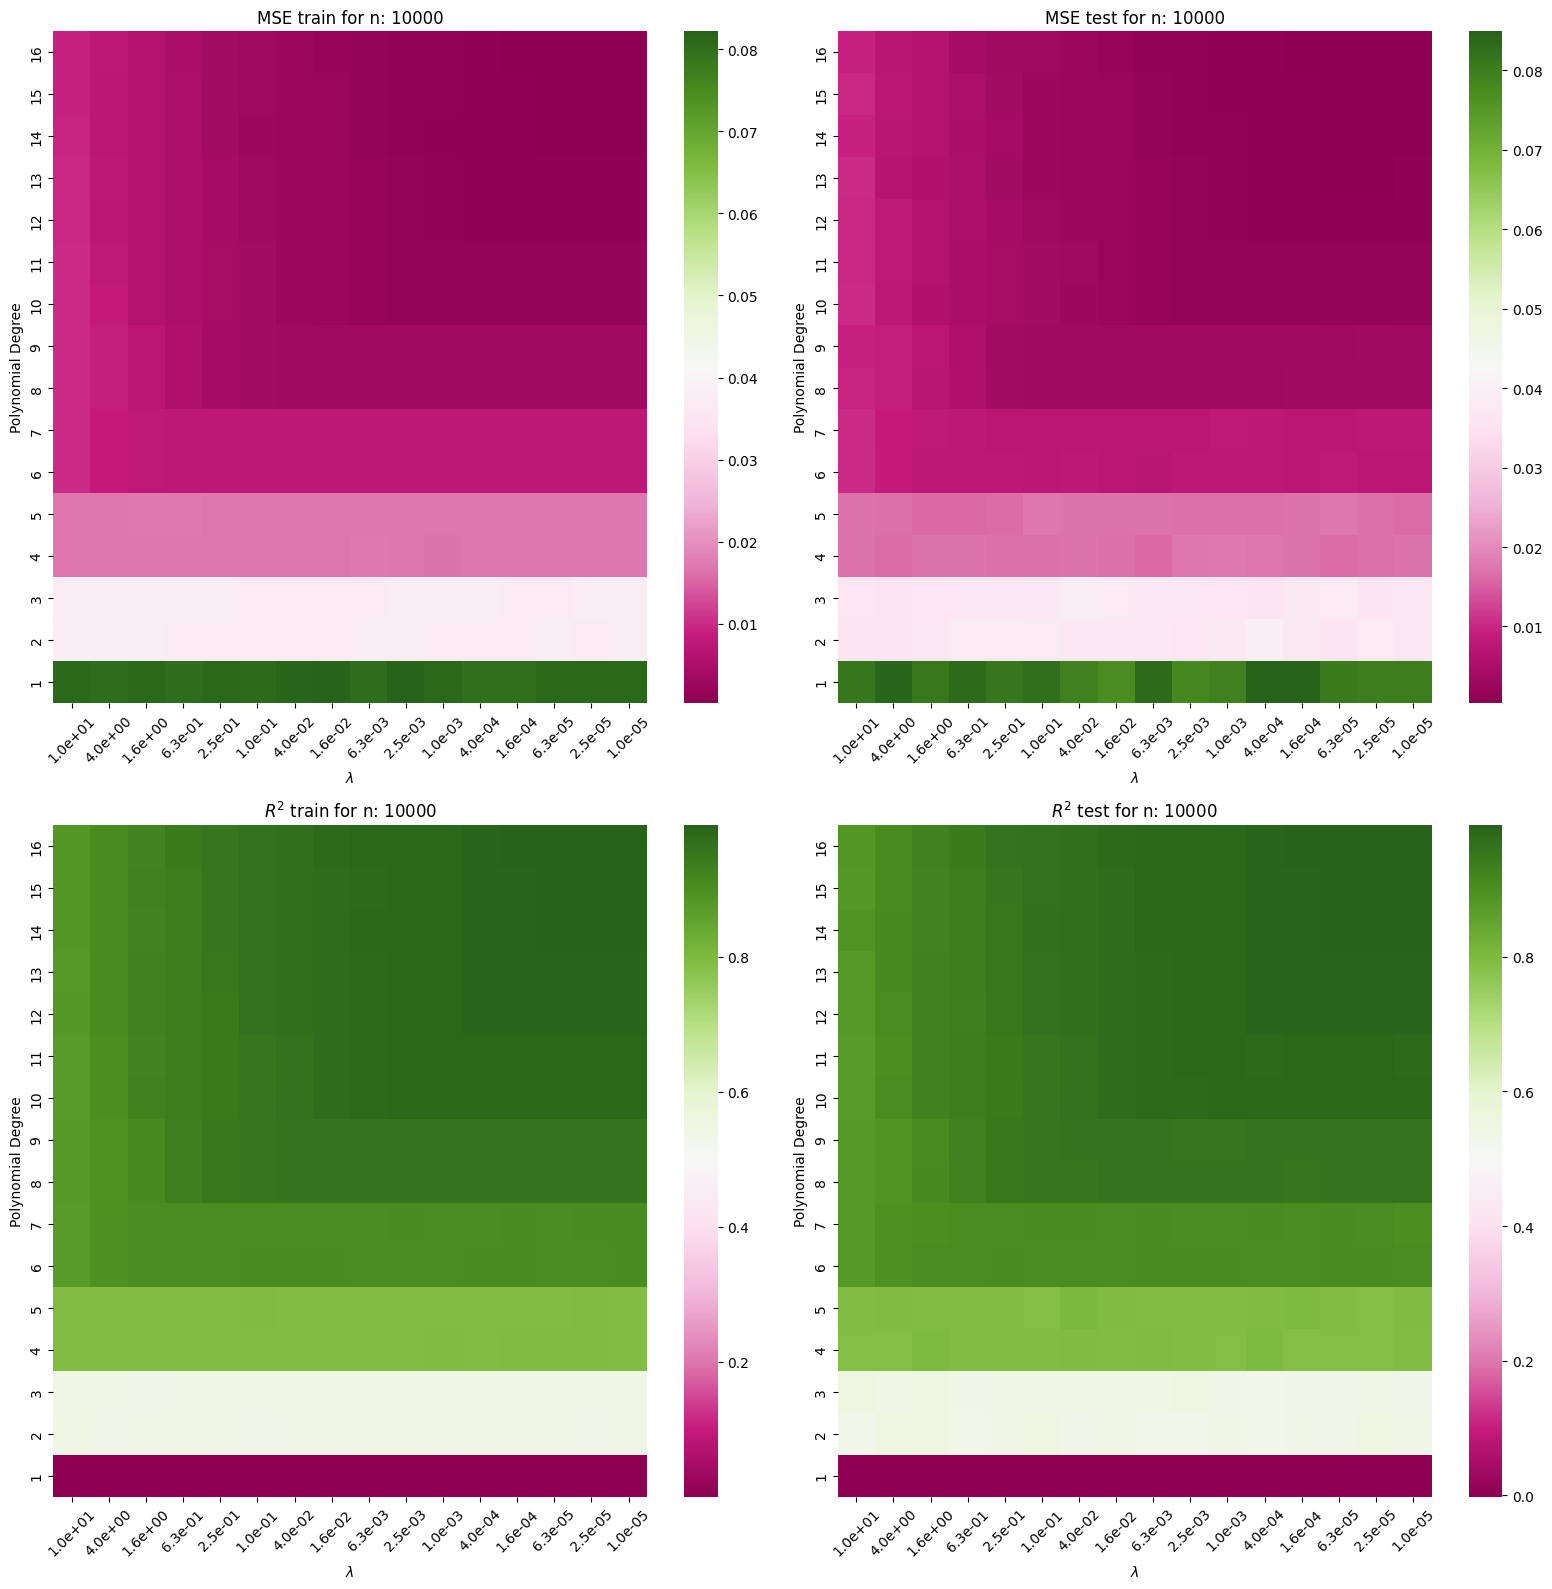

In [9]:
beta_ridge = poly_plot_ridge()

# exercise 1C

In [60]:
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.1
    lam = 0.1 #fixed lambda for the Ridge
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            theta_gdOLSn -= grad_OLSn * eta

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            # Update parameters theta
            theta_gdRidgen -= grad_Ridgen * eta 
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
        print(degree_plot.shape)
        print(mse_gdOLSn_test)
        

    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss")
    ax[0,1].set_title("Ridge loss")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression')
    ax[1,0].set_title('R2 scores for the OLS Regression')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression')
    ax[2,1].set_title('MSE for the Ridge Regression')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen


loop broken at 823 for degree: 1
(17,)
[0.46650526 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 703 for degree: 2
(17,)
[0.46650526 0.57051523 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 756 for degree: 3
(17,)
[0.46650526 0.57051523 0.33897965 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 731 for degree: 4
(17,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 705 for degree: 5
(17,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.49755056 0.
 0.         0.         0.         0.         0

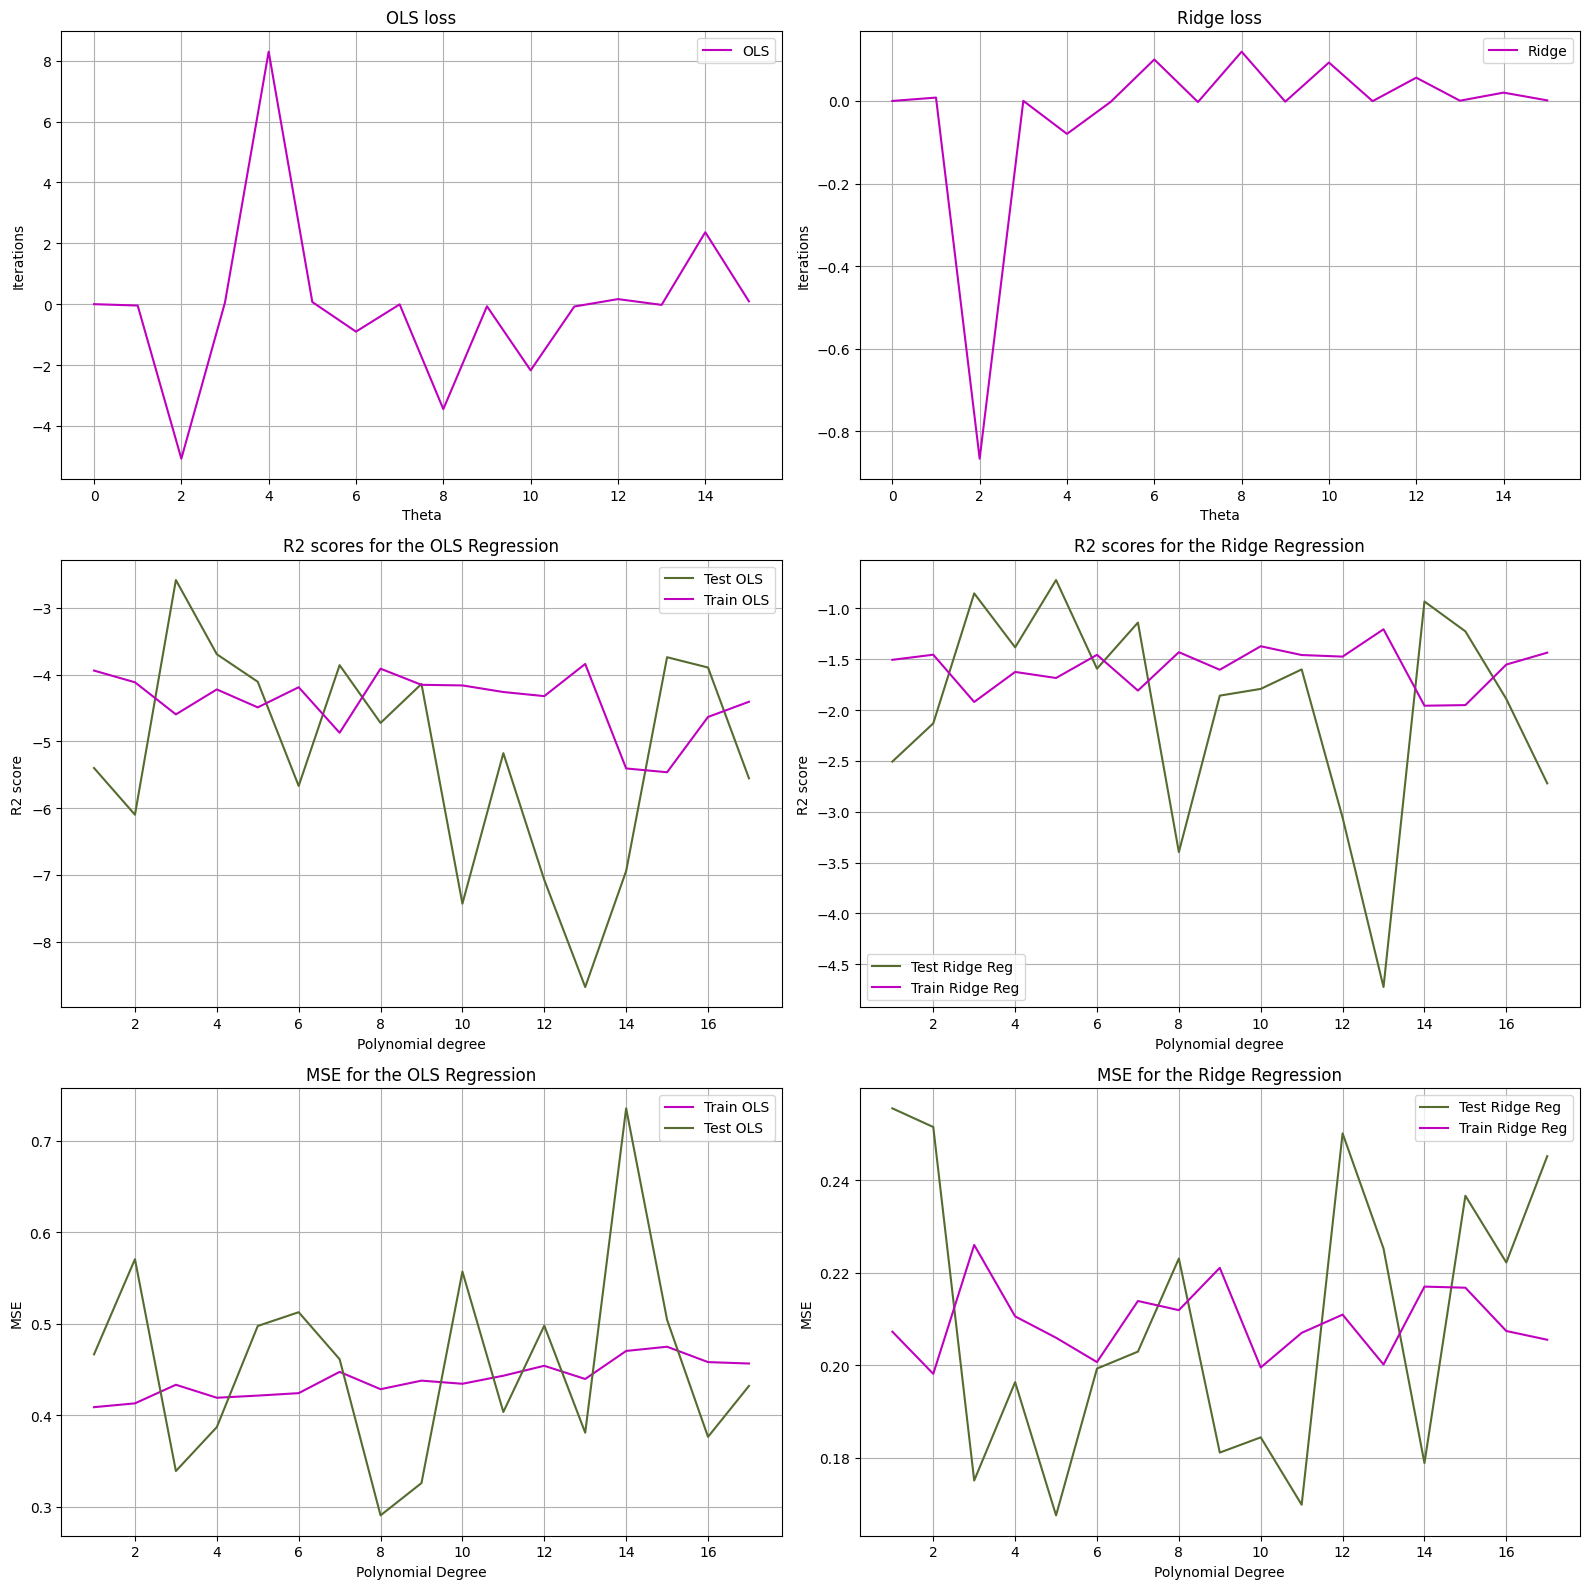

In [61]:
theta_grad_ols, theta_grad_ridge = gradient(x,y, n_feat=16)

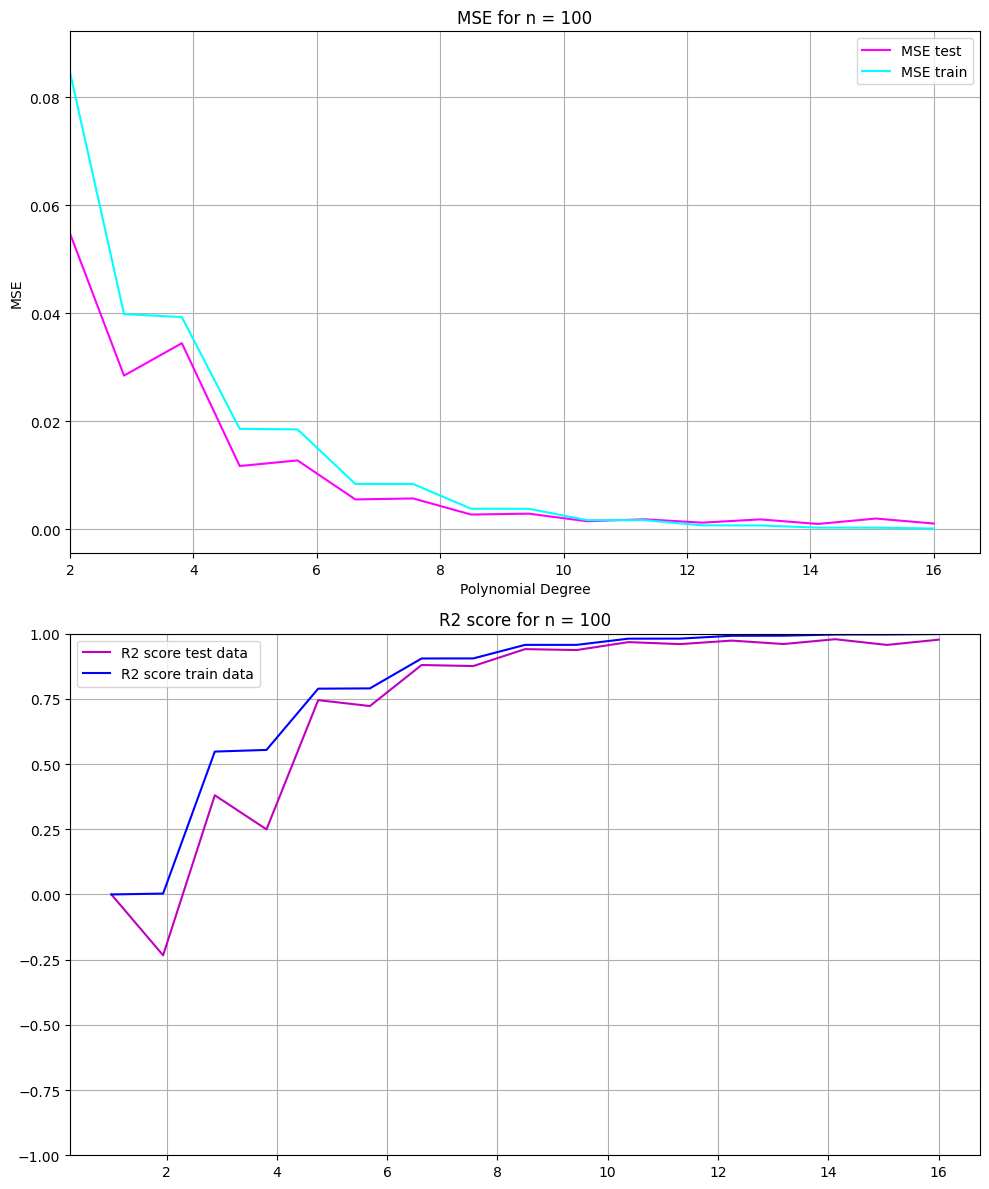

[ 0.00000000e+00 -5.97087104e-02 -1.70277260e+01  2.06956039e+00
  1.66910624e+02 -2.32424211e+01 -9.06718865e+02  1.19556669e+02
  2.84550352e+03 -3.20068117e+02 -5.27688246e+03  4.60244095e+02
  5.69507508e+03 -3.36158037e+02 -3.30119429e+03  9.76542026e+01
  7.93403240e+02]


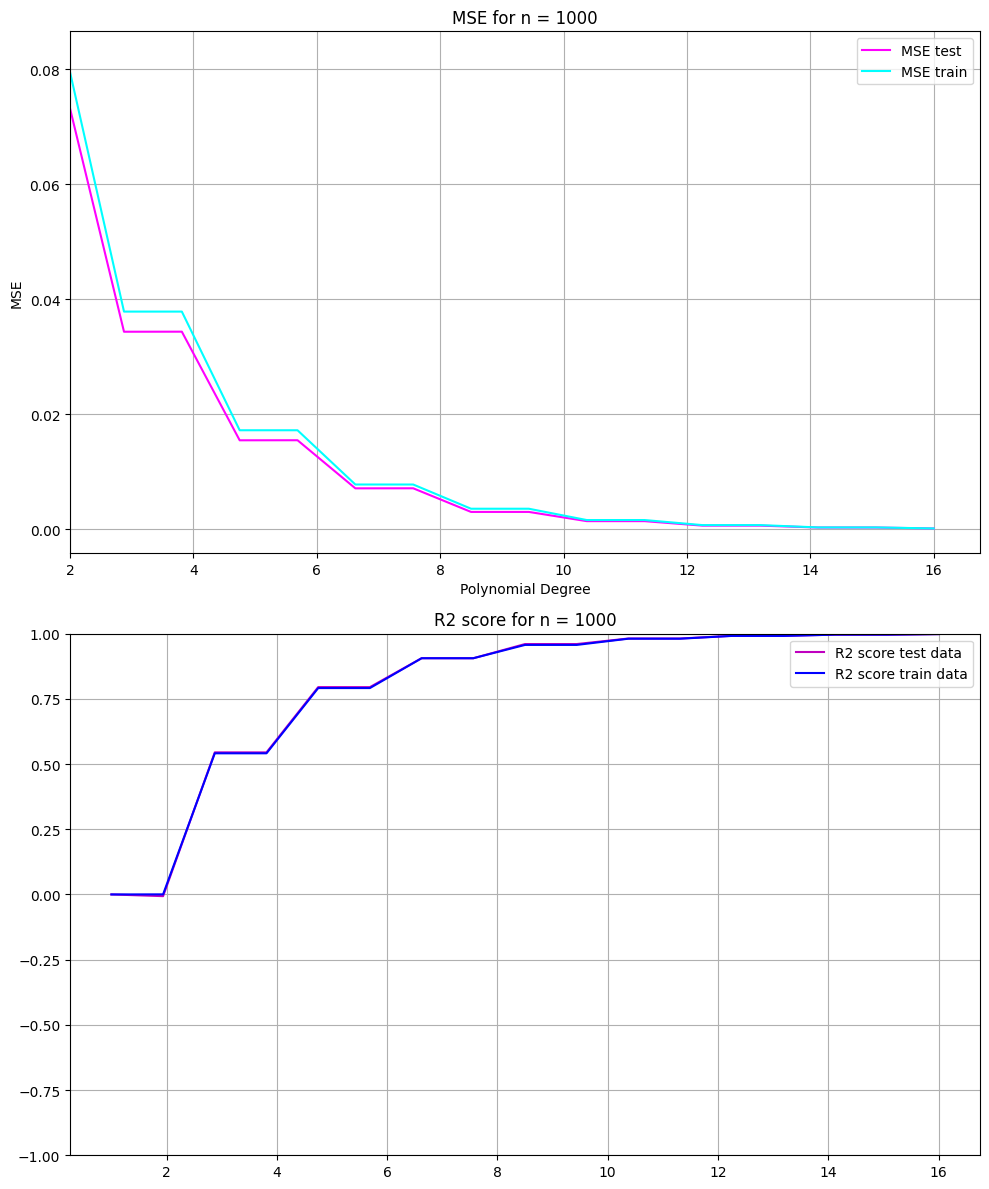

[ 0.00000000e+00 -8.41443567e-03 -1.68929535e+01  1.66006356e-01
  1.64103744e+02 -1.37916081e+00 -8.79934673e+02  5.99540021e+00
  2.71654473e+03 -1.49438387e+01 -4.94478285e+03  2.13446945e+01
  5.23158067e+03 -1.60648247e+01 -2.97129064e+03  4.89665688e+00
  6.99770602e+02]


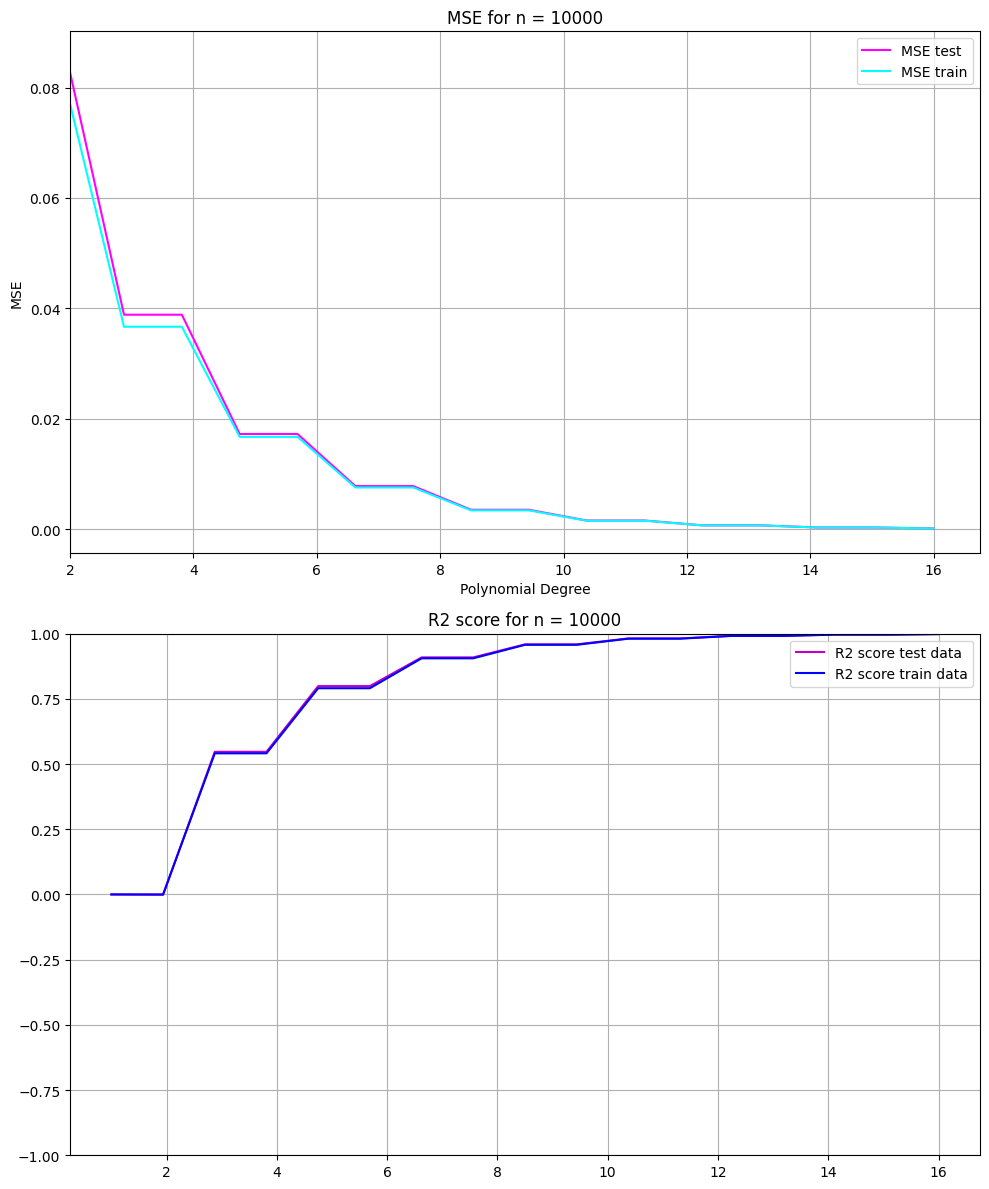

[ 0.00000000e+00 -1.73196139e-03 -1.68007788e+01  4.40270171e-02
  1.62815864e+02 -3.97592955e-01 -8.71816040e+02  1.73461539e+00
  2.68971745e+03 -4.03017298e+00 -4.89500402e+03  5.04448604e+00
  5.17936684e+03 -3.18680998e+00 -2.94239038e+03  7.92229540e-01
  6.93211199e+02]


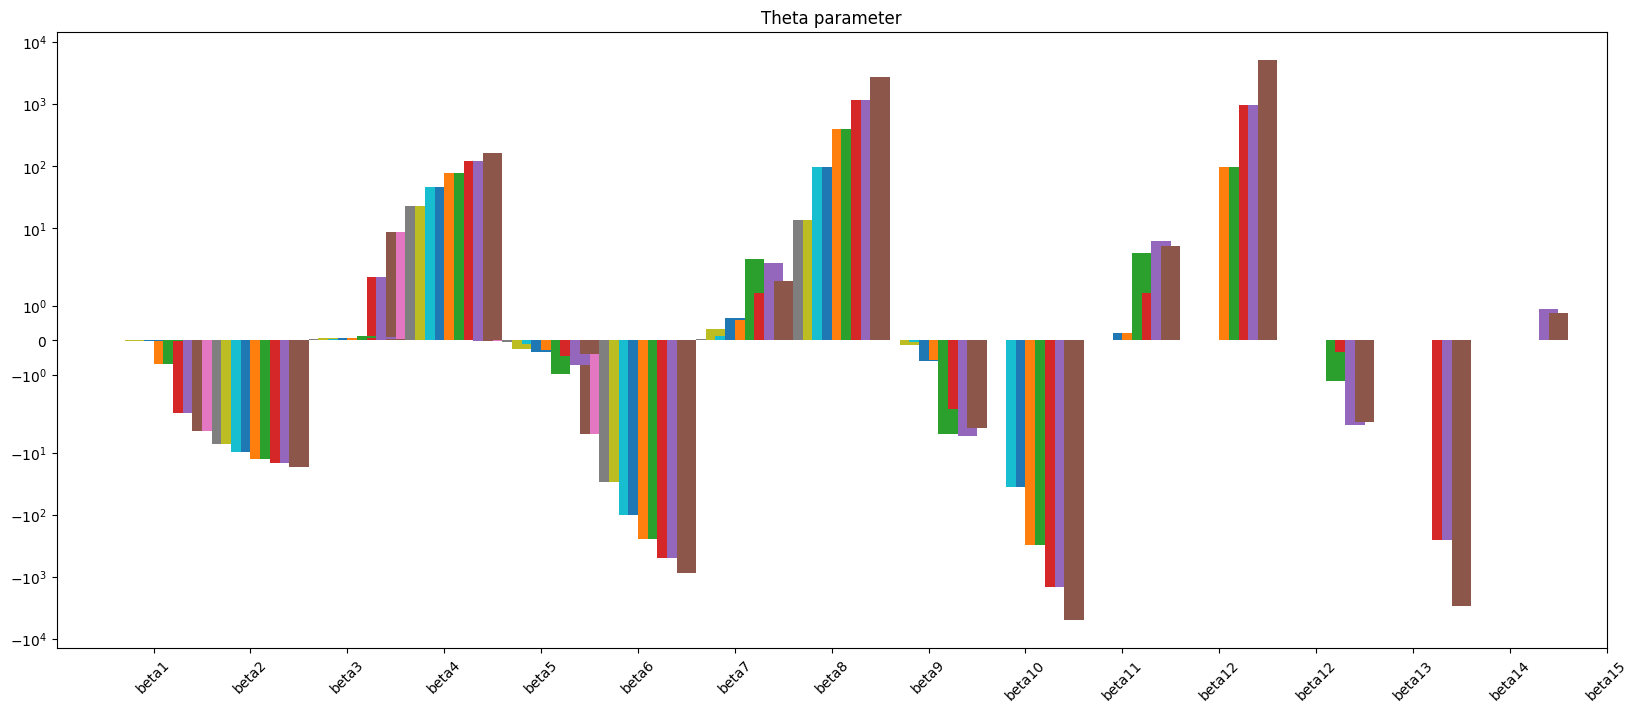

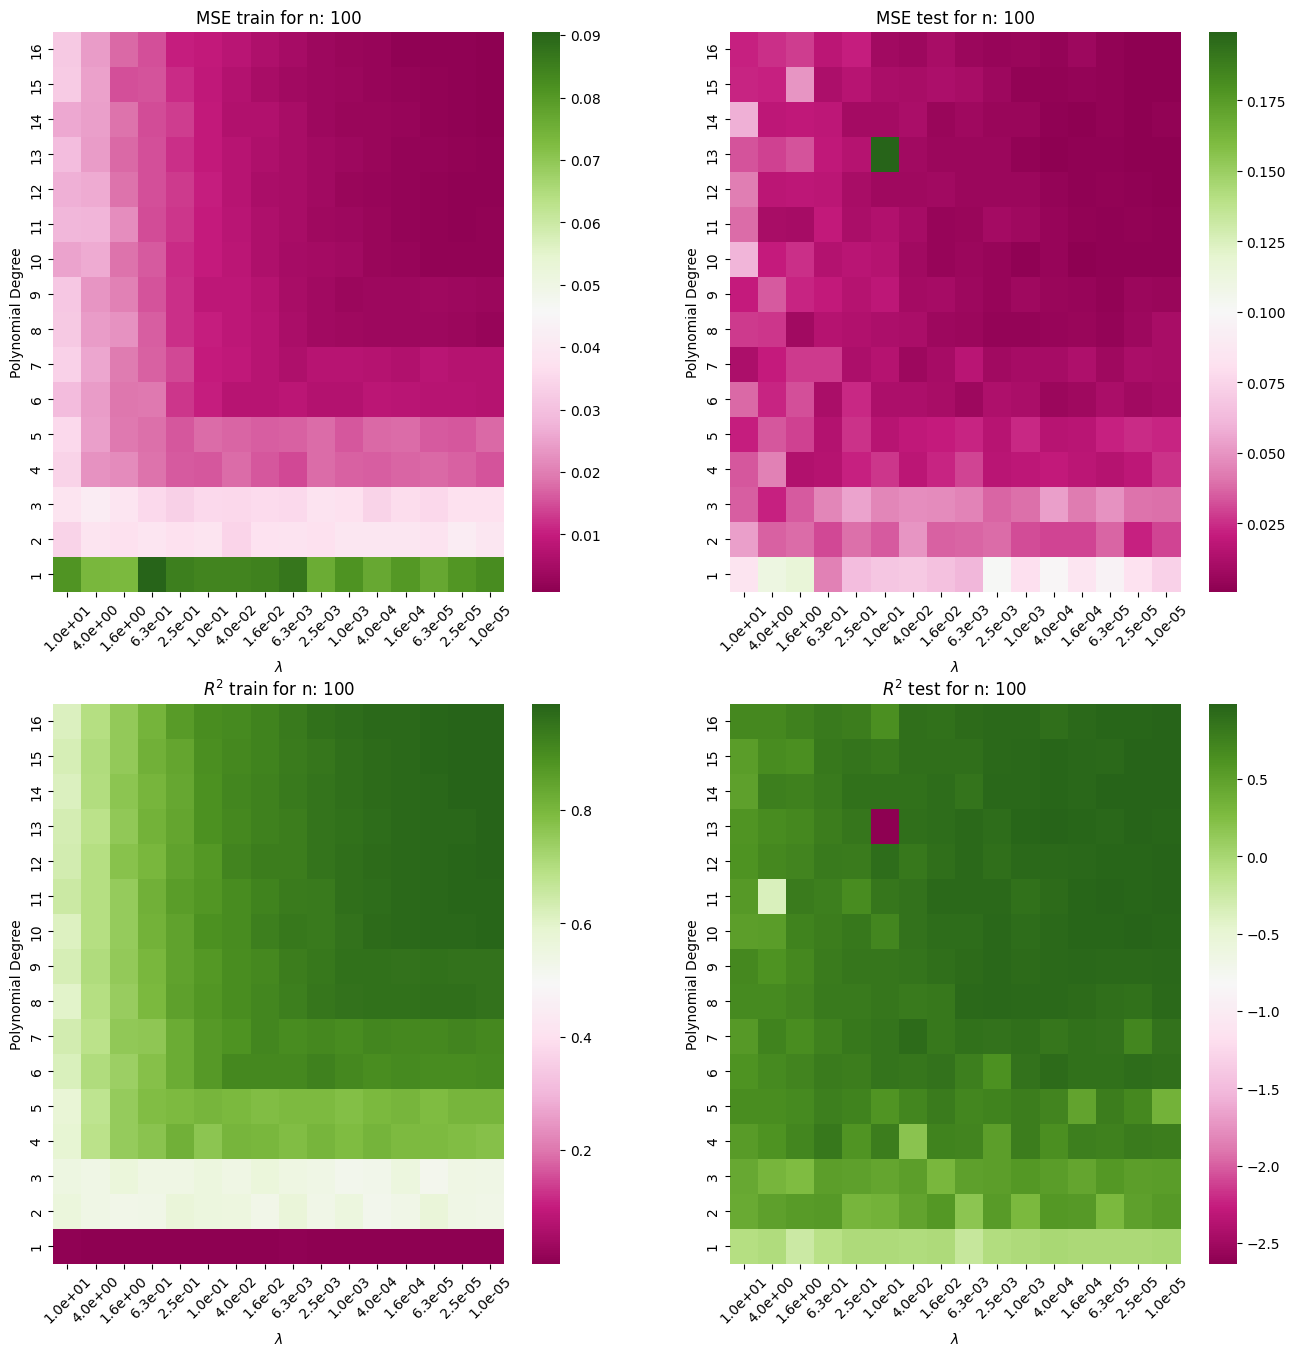

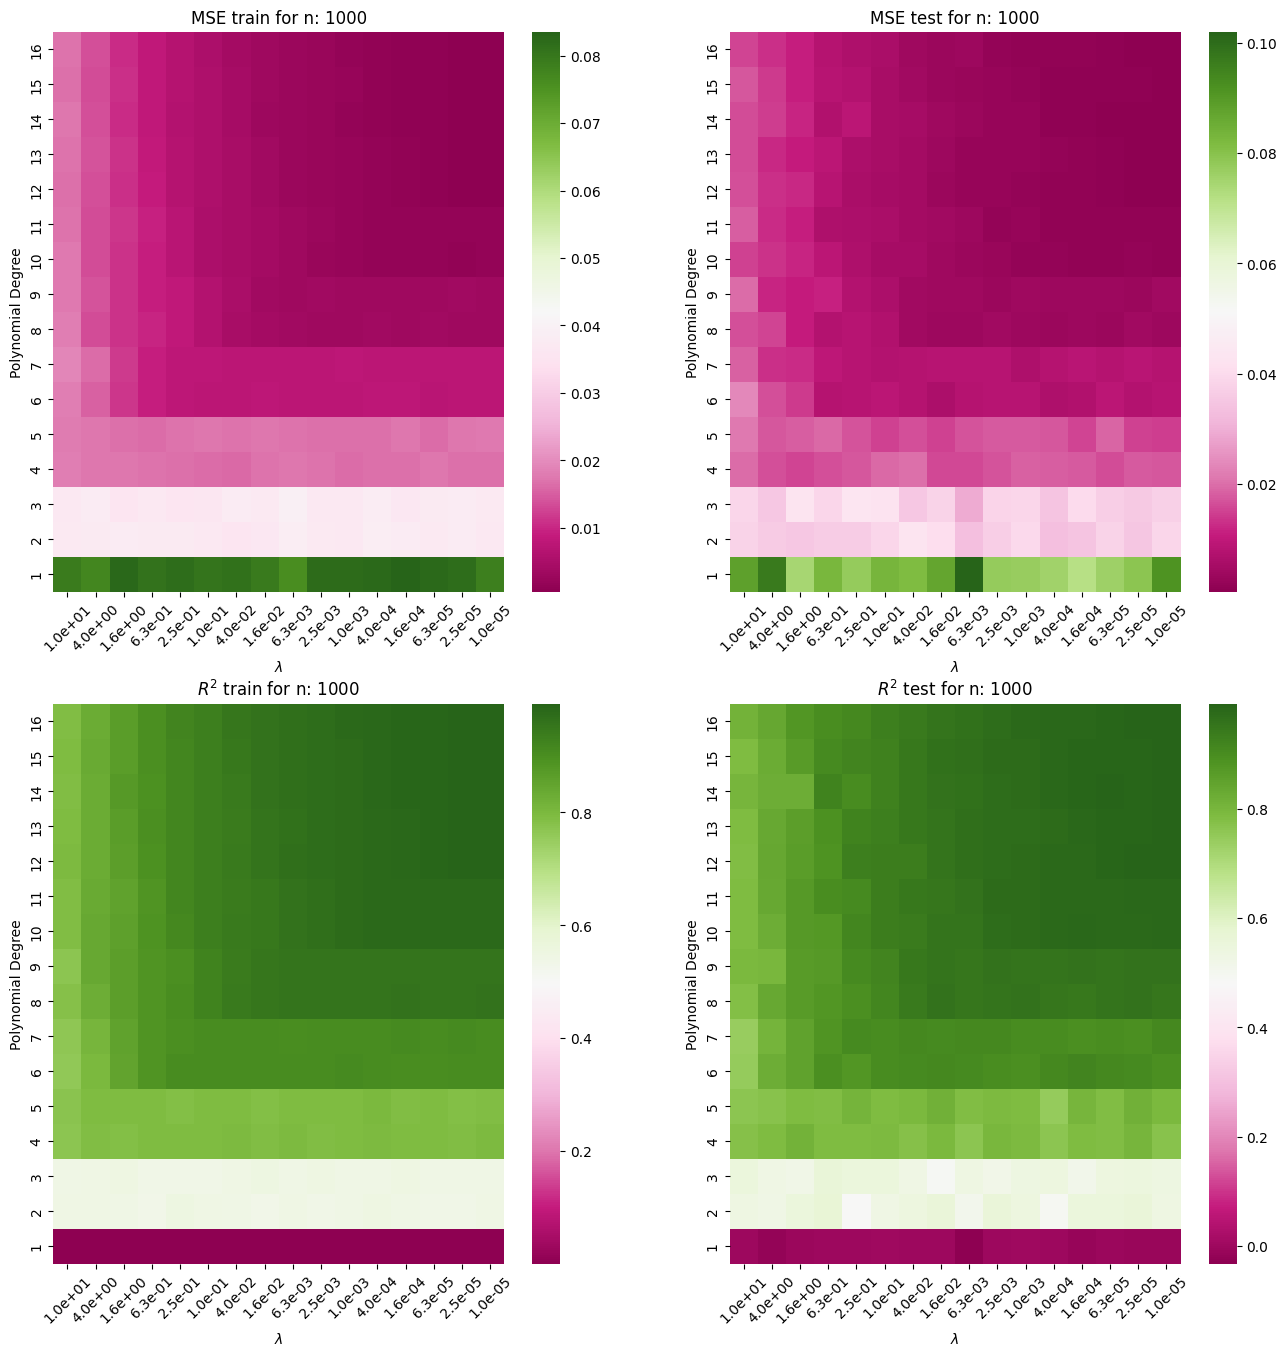

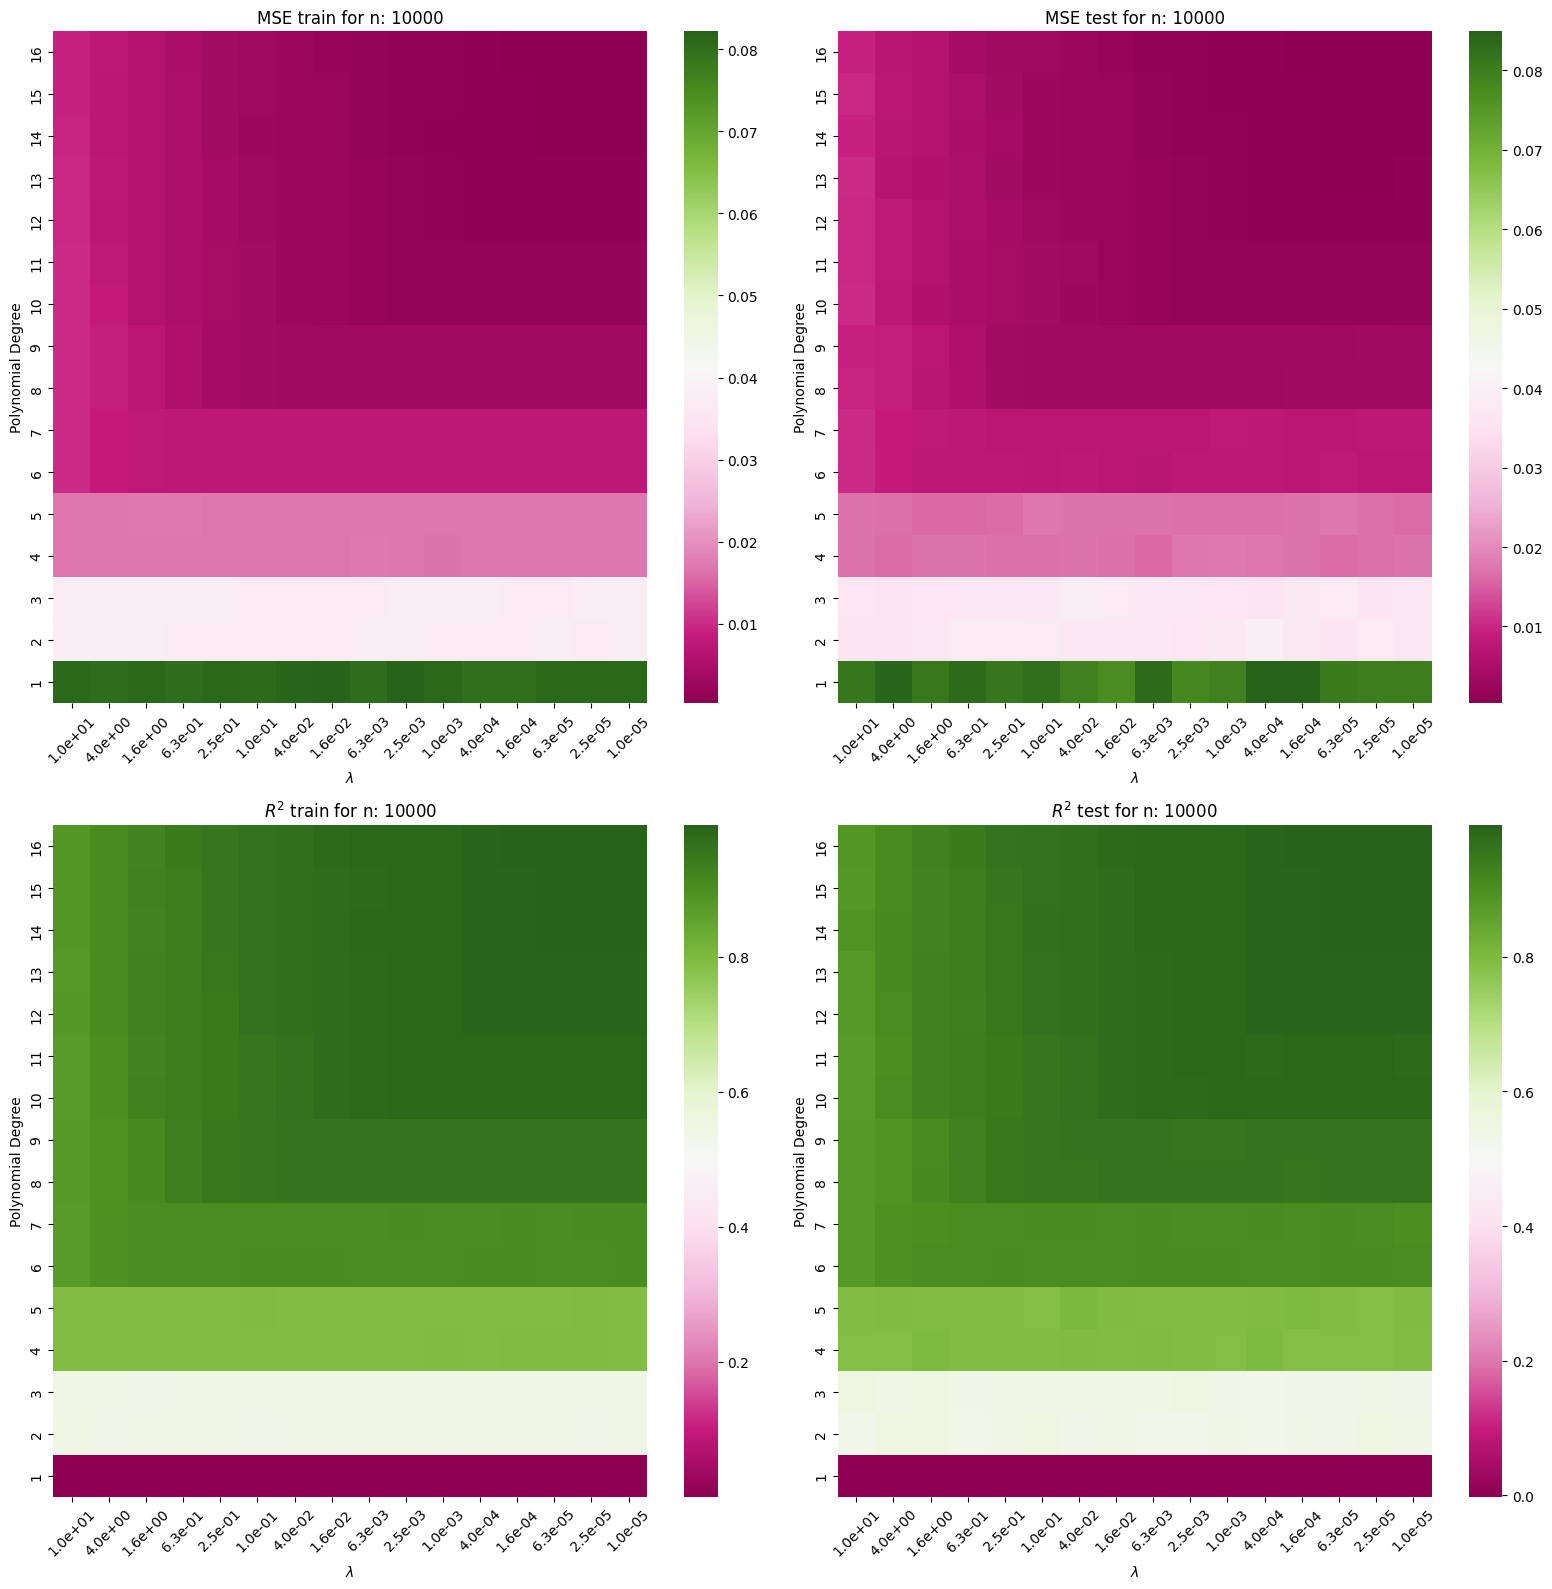

loop broken at 823 for degree: 1
(16,)
[0.46650526 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 703 for degree: 2
(16,)
[0.46650526 0.57051523 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 756 for degree: 3
(16,)
[0.46650526 0.57051523 0.33897965 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 731 for degree: 4
(16,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 705 for degree: 5
(16,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.49755056 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

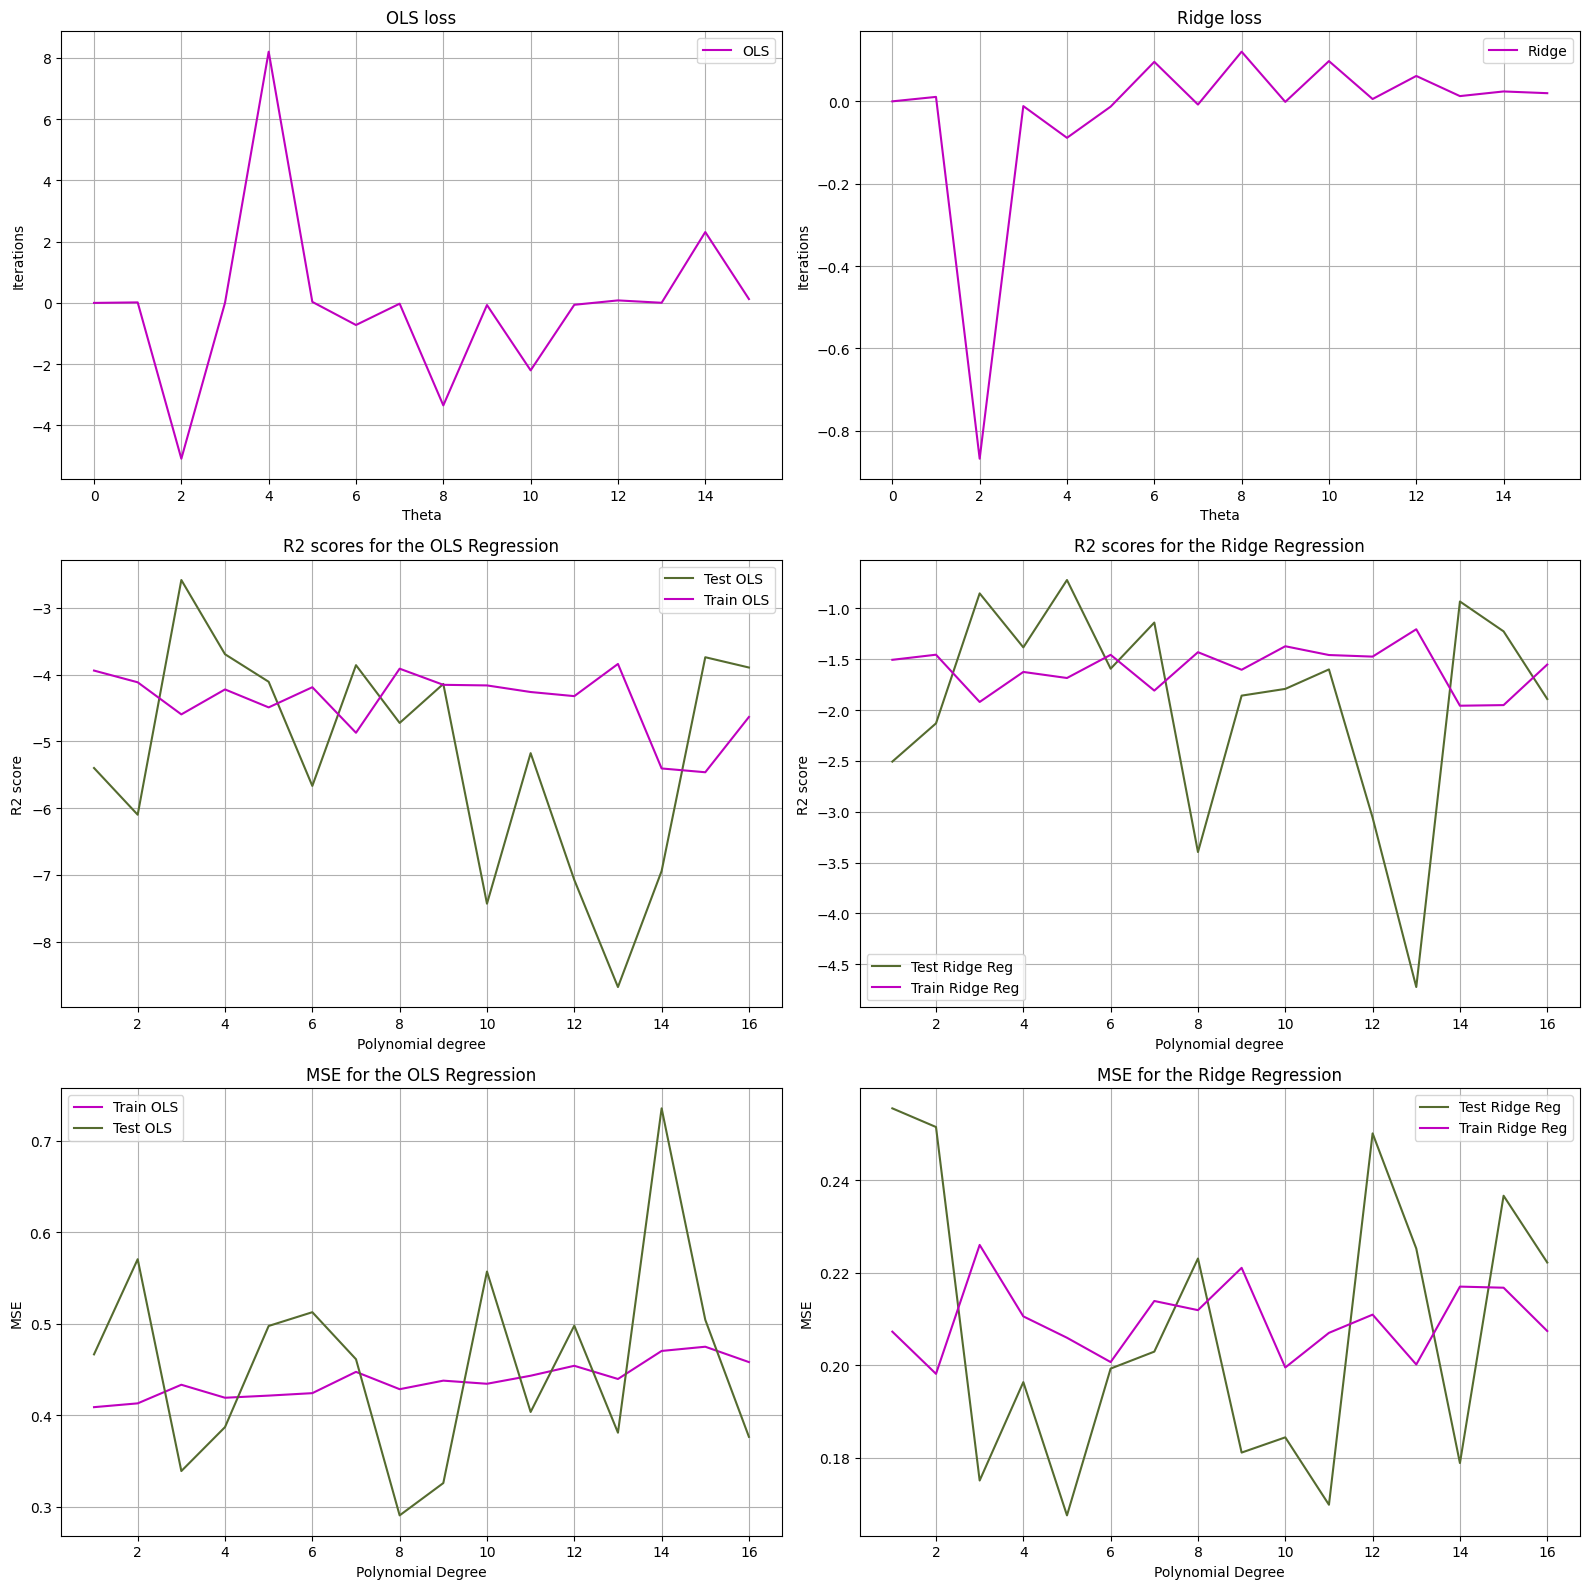

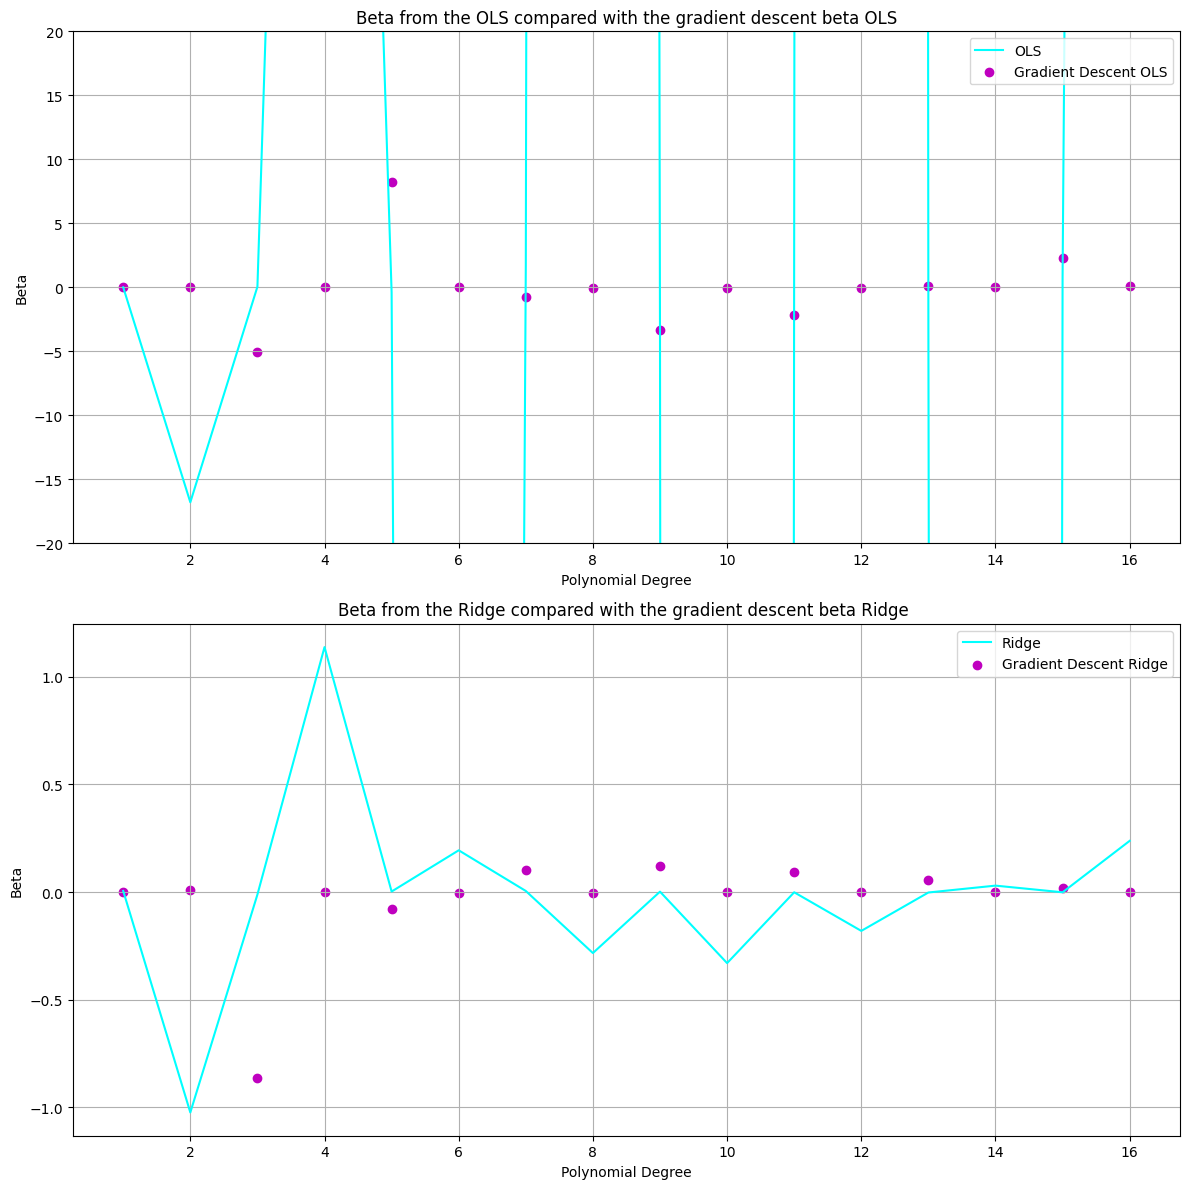

In [62]:
def compare_a_b_c(degree=16):
    #run functions:
    beta_ols = mse_poly_plot_OLS(degree, intercept = False)
    beta_ridge = poly_plot_ridge(intercept=False, annotate=False)

    theta_gdOLSn, theta_gdRidgen = gradient(x,y,n_feat=degree, degree=degree)

    x_line = np.arange(1, degree +1)
    fig, ax = plt.subplots(2,1, figsize = (12,12))
    ax[0].plot(x_line, beta_ols[1:degree+1], label = f'OLS', color = 'cyan')
    ax[0].scatter(x_line, theta_gdOLSn, color = 'm', label = 'Gradient Descent OLS')
    ax[0].grid(True)
    ax[0].set_title('Beta from the OLS compared with the gradient descent beta OLS')
    ax[0].set_xlabel('Polynomial Degree')
    ax[0].set_ylabel('Beta')
    ax[0].legend()

    ax[1].plot(x_line, beta_ridge[1:degree+1], label = f'Ridge', color = 'cyan')
    ax[1].scatter(x_line, theta_grad_ridge, color = 'm', label = 'Gradient Descent Ridge')
    ax[1].grid(True)
    ax[1].set_title('Beta from the Ridge compared with the gradient descent beta Ridge ')
    ax[1].set_xlabel('Polynomial Degree')
    ax[1].set_ylabel('Beta')
    ax[1].legend()
    ax[0].set_ylim(-20,20)
    plt.tight_layout()
    plt.show()

compare_a_b_c()

# Exercise D

Adding:
- momentum
- ADAGrad
- RMSProp
- ADAM

In [ ]:
#Gradient desvent with momentum - should improve the results of GD
#Its memory of the previous steps - to better accurate the next steps

#I have to make a general gradient function first:

def objective(X_test_s, theta, y_test, y_mean):
    y_pred = X_test_s @ theta + y_mean
    return MSE(y_test, y_pred) 

def gradient_momentum(x,y, bounds, step_size, momentum, degree=17):
    lam = 0.1 #fixed lambda for the Ridge
    num_iters = 1000

    theta_gdOLSn = np.zeros(degree) #OLS
    theta_gdRidgen = np.zeros(degree) #Ridge

    #tracking solutions
    solutions_ols, scores_ols = list(), list()
    solutions_ridge, scores_ridge = list(), list()
    #generation of initial points
    solution_OLS = bounds[:,0] + rand(len(bounds)) * (bounds[:,1] - bounds[:,0])
    solution_Ridge = bounds[:,0] + rand(len(bounds)) * (bounds[:,1] - bounds[:,0])
    #keeping track 
    change_OLS = 0.0
    change_Ridge = 0.0

    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,p, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS - the derivation + momentum 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            new_change_ols = step_size * grad_OLSn + momentum * change_OLS
            #save changes
            solution_OLS = solution_OLS - new_change_ols 
            #save change
            change_OLS = new_change_ols
            #evaluate original solution
            solution_original_OLS = objective(solution_OLS)
            #store solutions
            solutions_ols.append(solution_OLS)
            #scores_ols.append(solution_original_OLS) 

        #gradient descent Ridge - the derivation + momentum
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            # Update parameters theta
            new_change_ridge = step_size * grad_Ridgen + momentum * change_Ridge
            #save changes
            solution_Ridge = solution_Ridge - new_change_ridge
            #save changes
            change_Ridge = new_change_ridge
            #evaluate original solution
            solution_original_Ridge = objective(solution_Ridge) 
            #store solutions
            solutions_ridge.append(solution_Ridge)
            #scores_ridge.append(solution_original_Ridge)
    
            #if (np.linalg.norm(theta_gdRidgen) < tol):
            #    print(f'loop broken at {str(t)} for degree: {p}')
            #    break
        return [solutions_ols, solutions_ridge, scores_ols, scores_ridge]
    
solutions_ols_mom, solutions_ridge_m, scores_ols, scores_ridge = gradient_momentum(x,y, np.asarray([[-1.0,1.0]]), 0.1, 0.3)
bounds = np.asarray([[-1.0,1.0]])
inputs = np.arange(bounds[0,0], bounds[0,1] + 0.1, 0.1)
results = objective(inputs)

plt.plot(inputs, results)
plt.plot(solutions_ols_mom, scores_ols)    
plt.plot(solutions_ridge_m, scores_ridge)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 17 is different from 2)

In [96]:
bounds = np.asarray([[-1.0,1.0]])
inputs = np.arange(bounds[0,0], bounds[0,1] + 0.1, 0.1)
results = objective(inputs)

#plt.plot(inputs, results)
#plt.plot(solutions_ols_mom, scores_ols)
